In [1]:
import pandas as import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("20-digitalskysurvey.csv")

In [4]:
df.head()
# specobjid = object identifier
# class  = object  class (galaxy, star or quasar object)
# redshift = final redshift(electro magnetic raditon)
# plate =plate number(levha)
# Mjd = mjd of observation
# fiberid = fiberid
# u,g,r,i,z = better of DeV/EXP magnitude fit

objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  54922      491  
1  51615      541  
2  52023      513  
3  54922      510  
4  54922      512

In [5]:
columns_to_drop = ["objid", "specobjid", "rerun", "camcol", "field", "run"]

In [6]:
df.drop(columns_to_drop, axis=1, inplace=True)

In [7]:
df.head()

ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

    class  redshift  plate    mjd  fiberid  
0    STAR -0.000009   3306  54922      491  
1    STAR -0.000055    323  51615      541  
2  GALAXY  0.123111    287  52023      513  
3    STAR -0.000111   3306  54922      510  
4    STAR  0.000590   3306  54922      512

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   class     10000 non-null  object 
 8   redshift  10000 non-null  float64
 9   plate     10000 non-null  int64  
 10  mjd       10000 non-null  int64  
 11  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 937.6+ KB


In [10]:
df["class"].value_counts()

class
GALAXY    4998
STAR      4152
QSO        850
Name: count, dtype: int64

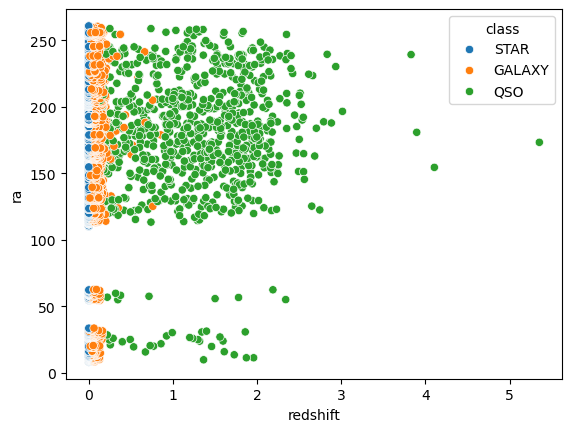

In [11]:
sns.scatterplot(data=df, x="redshift", y="ra", hue="class")
plt.show()

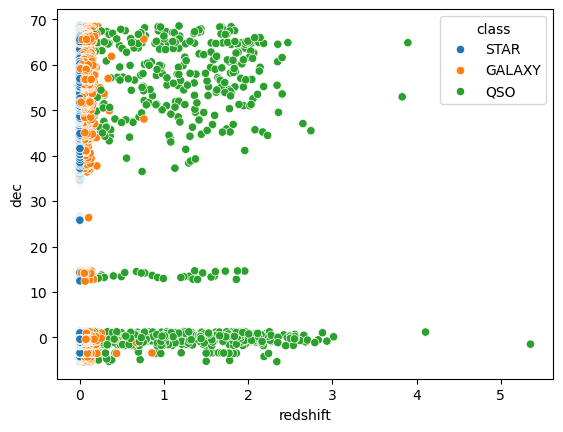

In [12]:
sns.scatterplot(data=df, x="redshift", y="dec", hue="class")
plt.show()

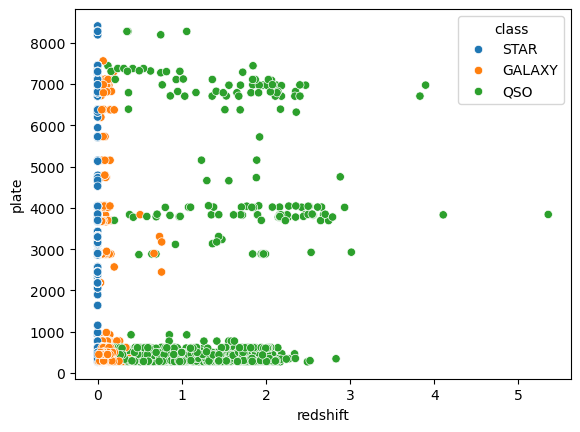

In [13]:
sns.scatterplot(data=df, x="redshift", y="plate", hue="class")
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
# bizim y kolunumuz olduğu için train test yapmadan yaptık.

In [15]:
label_enc = LabelEncoder()
df["class"] = label_enc.fit_transform(df["class"])

In [16]:
df.head()

ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

   class  redshift  plate    mjd  fiberid  
0      2 -0.000009   3306  54922      491  
1      2 -0.000055    323  51615      541  
2      0  0.123111    287  52023      513  
3      2 -0.000111   3306  54922      510  
4      2  0.000590   3306  54922      512

In [17]:
df.corr()

ra       dec         u         g         r         i  \
ra        1.000000  0.003596  0.031238  0.043909  0.047103  0.045731   
dec       0.003596  1.000000  0.035279  0.061875  0.063404  0.058292   
u         0.031238  0.035279  1.000000  0.849232  0.692379  0.602630   
g         0.043909  0.061875  0.849232  1.000000  0.958106  0.907419   
r         0.047103  0.063404  0.692379  0.958106  1.000000  0.977672   
i         0.045731  0.058292  0.602630  0.907419  0.977672  1.000000   
z         0.042950  0.056870  0.551483  0.879622  0.969197  0.981507   
class    -0.043219 -0.058918 -0.269044 -0.099212  0.049628  0.146791   
redshift  0.030307  0.067021  0.163741  0.407576  0.441080  0.431450   
plate    -0.095329  0.088342 -0.129430 -0.054981  0.019787  0.072958   
mjd      -0.086887  0.066147 -0.168793 -0.092772 -0.009345  0.050896   
fiberid   0.057485  0.155012  0.011301  0.047187  0.061081  0.069977   

                 z     class  redshift     plate       mjd   fiberid  
ra        0.042950 -0.043219  0.030307 -0.095329 -0.086887  0.057485  
dec       0.056870 -0.058918  0.067021  0.088342  0.066147  0.155012  
u         0.551483 -0.269044  0.163741 -0.129430 -0.168793  0.011301  
g         0.879622 -0.099212  0.407576 -0.054981 -0.092772  0.047187  
r         0.969197  0.049628  0.441080  0.019787 -0.009345  0.061081  
i         0.981507  0.146791  0.431450  0.072958  0.050896  0.069977  
z         1.000000  0.215758  0.424034  0.112397  0.095658  0.067980  
class     0.215758  1.000000 -0.075510  0.585495  0.648768  0.053593  
redshift  0.424034 -0.075510  1.000000 -0.038091 -0.057957  0.046532  
plate     0.112397  0.585495 -0.038091  1.000000  0.966881  0.229811  
mjd       0.095658  0.648768 -0.057957  0.966881  1.000000  0.190328  
fiberid   0.067980  0.053593  0.046532  0.229811  0.190328  1.000000

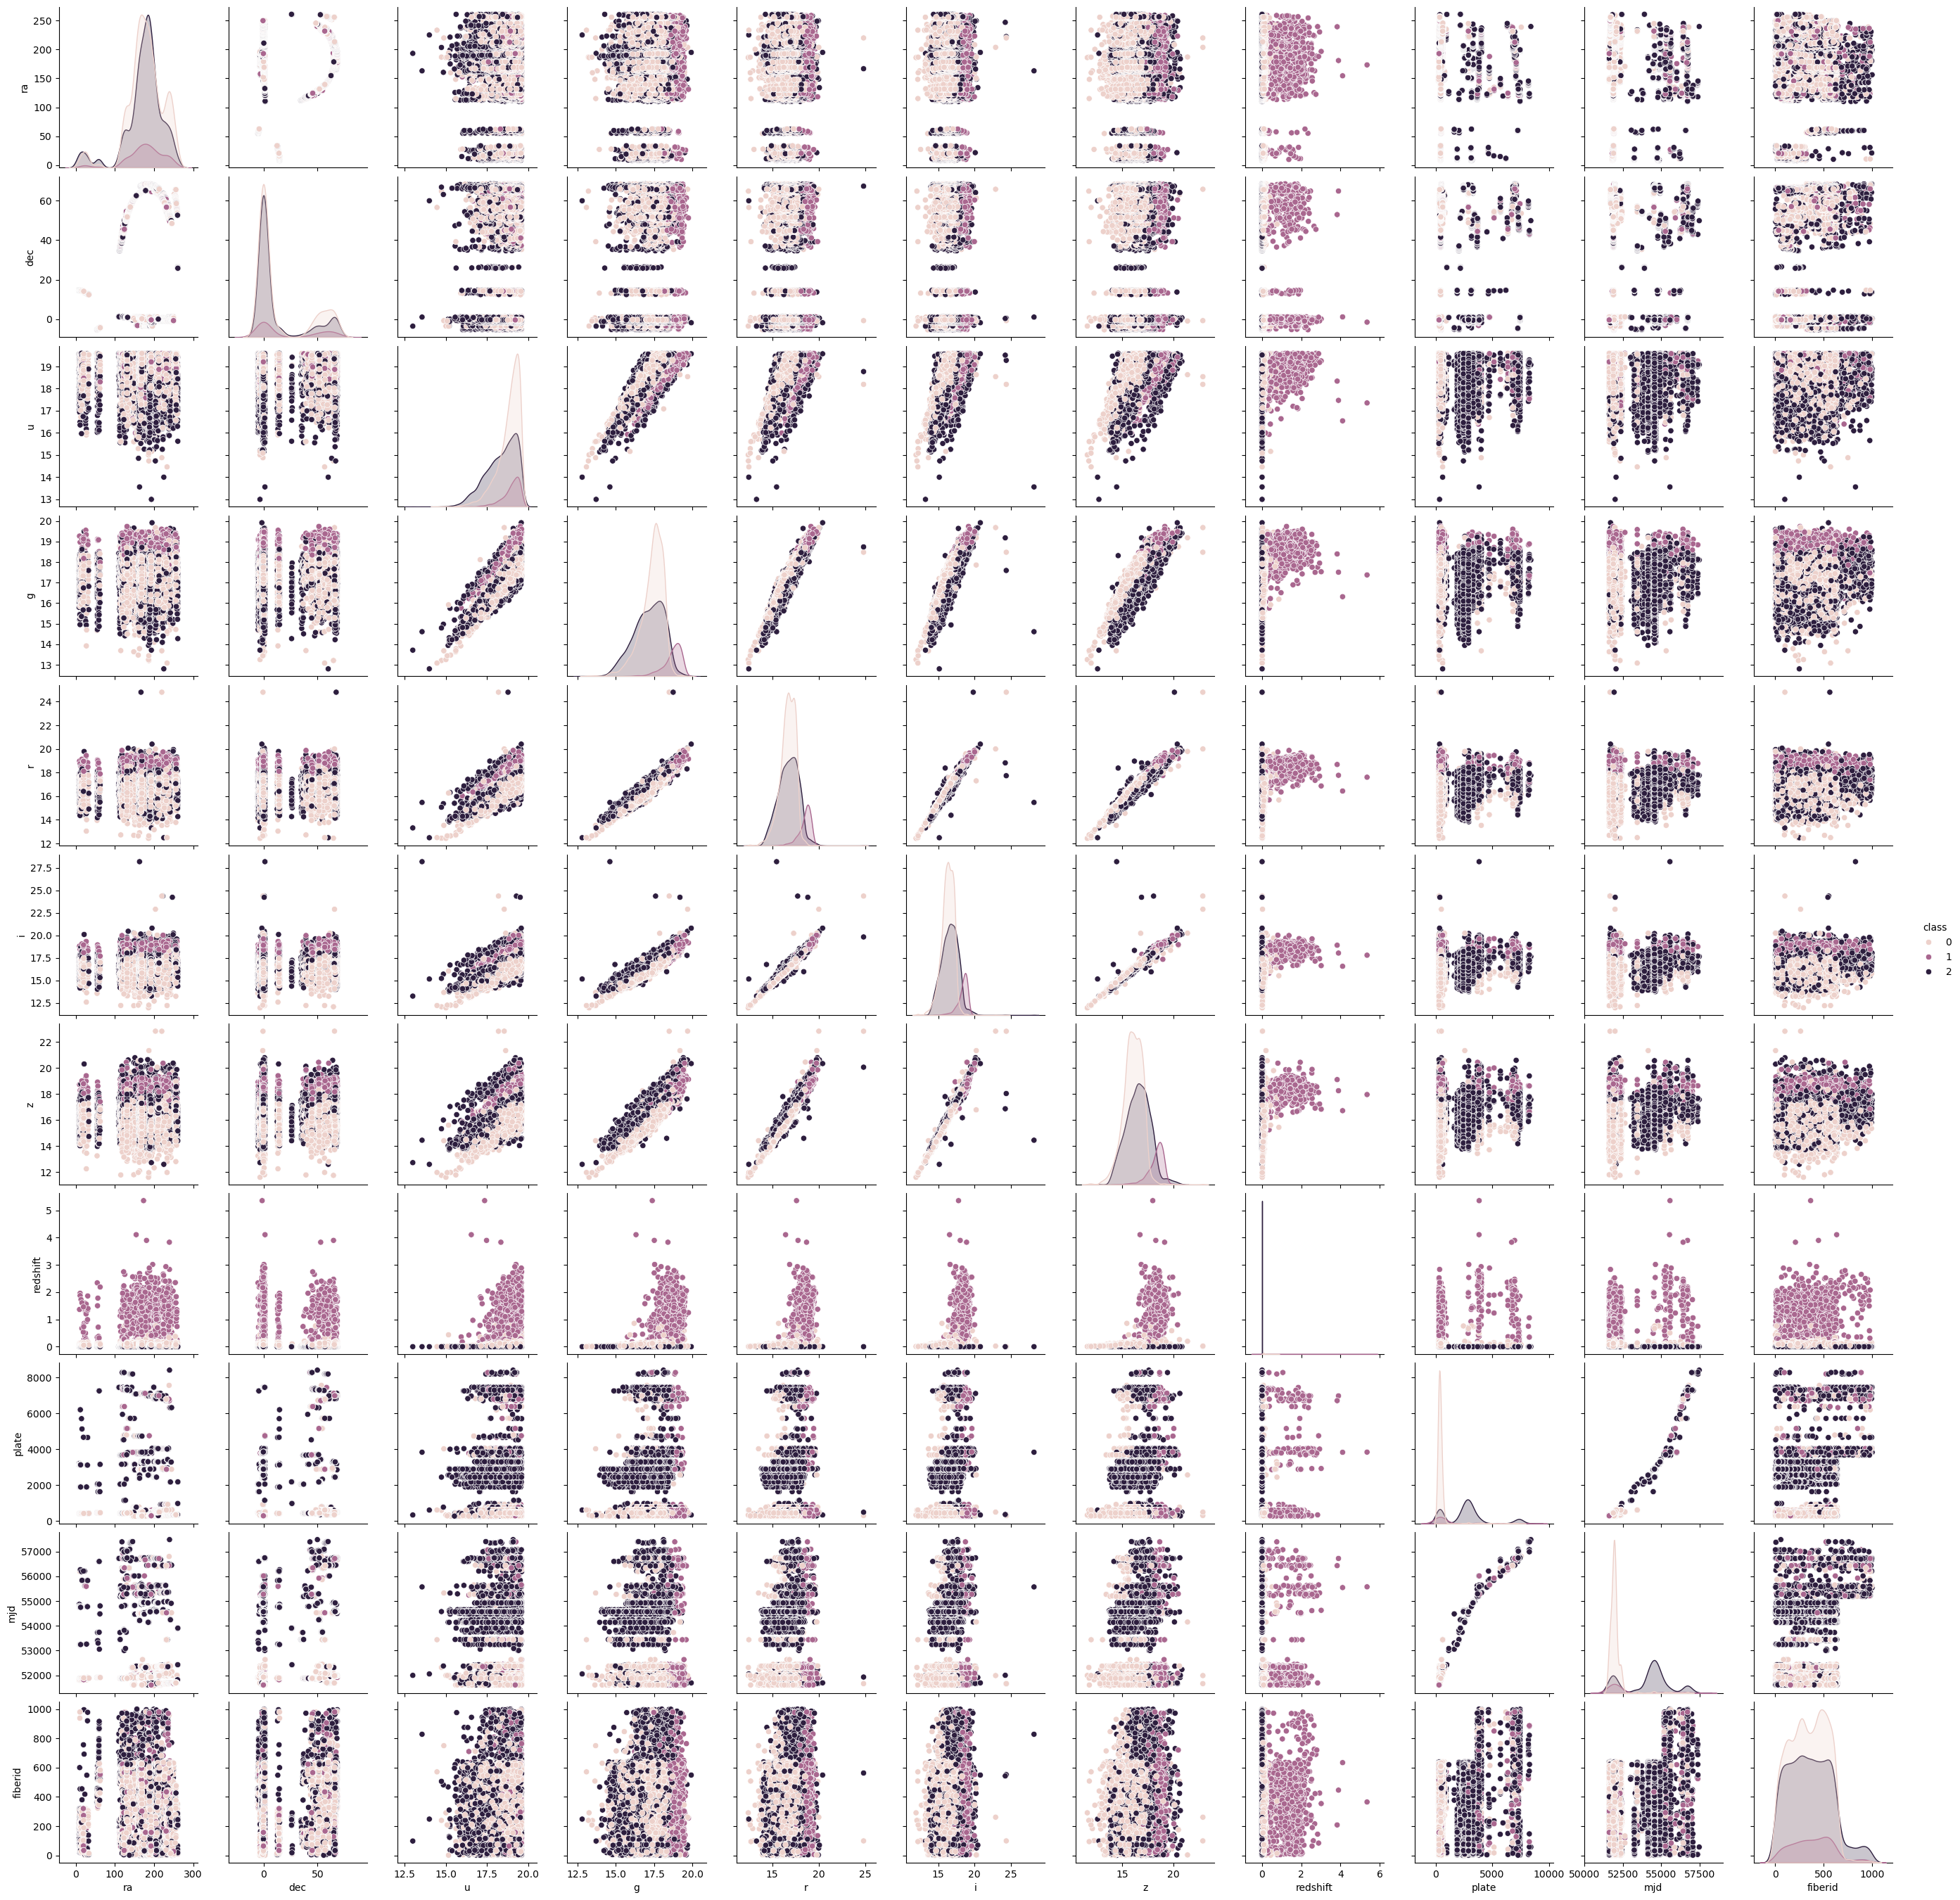

In [18]:
sns.pairplot(df, hue="class")
plt.show()

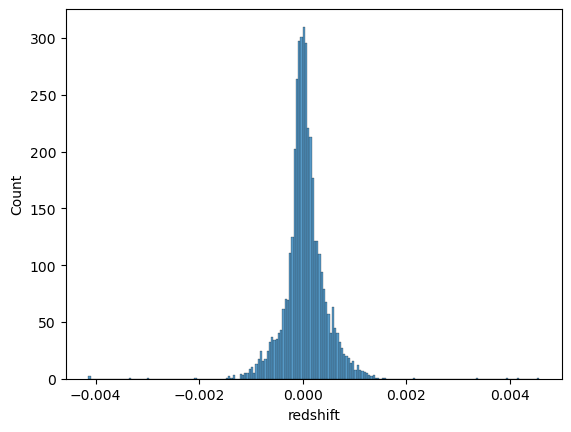

In [19]:
sns.histplot(df[df["class"] == 2].redshift)
plt.show()

In [20]:
df["class"].value_counts()

class
0    4998
2    4152
1     850
Name: count, dtype: int64

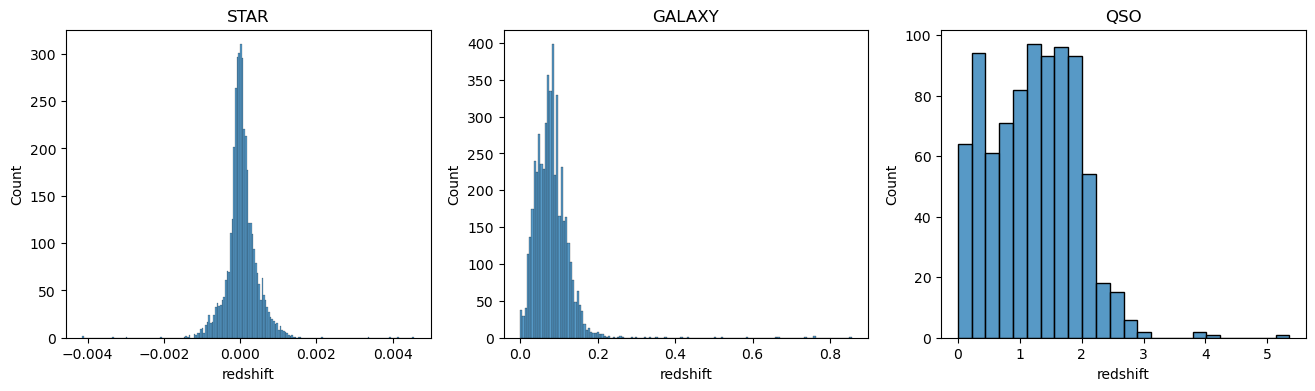

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
ax=sns.histplot(df[df["class"] == 2].redshift, ax = axes[0])
ax.set_title("STAR")
ax=sns.histplot(df[df["class"] == 0].redshift, ax = axes[1])
ax.set_title("GALAXY")
ax=sns.histplot(df[df["class"] == 1].redshift, ax = axes[2])
ax.set_title("QSO")
plt.show()

In [23]:
X = df.drop("class", axis=1)
y = df["class"]

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [29]:
from xgboost import XGBClassifier

In [30]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9875757575757576
[[1667   13    7]
 [  17  253    1]
 [   3    0 1339]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1687
           1       0.95      0.93      0.94       271
           2       0.99      1.00      1.00      1342

    accuracy                           0.99      3300
   macro avg       0.98      0.97      0.98      3300
weighted avg       0.99      0.99      0.99      3300



In [33]:
# hyperparameter tuning

In [34]:
params = {
    "n_estimators" : [100,200,300,500],
    "learning_rate" : [0.01, 0.1],
    "max_depth" : [5,8,12,20,30],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.8, 1]
}

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
grid = GridSearchCV(estimator=XGBClassifier(), param_grid=params, cv=5, n_jobs=-1)

In [38]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.8, 1],
                         'learning_rate': [0.01, 0.1],
                         'max_depth': [5, 8, 12, 20, 30],
                         'n_estimators': [100, 200, 300, 500]})

In [40]:
grid.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 500}

In [41]:
y_pred = grid.predict(X_test)

In [42]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9884848484848485
[[1669   11    7]
 [  18  252    1]
 [   1    0 1341]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1687
           1       0.96      0.93      0.94       271
           2       0.99      1.00      1.00      1342

    accuracy                           0.99      3300
   macro avg       0.98      0.97      0.98      3300
weighted avg       0.99      0.99      0.99      3300

